# House Price Prediction
![house sold](./images/house_sold.jpg)

## Overview
This project shows how a house price can be estimated. Many features of a house are taken into the account for this estimation. Some visualizations are included to aid in understanding the progress.

## Business Problem
A realtor wants to help customers sell their houses. The realtor uses housing information to make houses' price estimations using a prediction model.

## Data Understanding
This project uses the King County House Sales dataset. The dataset has around 20 columns. Several columns will be removed as they are less likely to be helpful in price estimation.

In [1]:
# import necessar libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# read data
house = pd.read_csv("data/kc_house_data.csv")

# drop irrelevant columns
house.drop(['id',
            'date',
            'zipcode', 
            'lat', 
            'long', 'sqft_above',
            'sqft_living15', 
            'sqft_lot15'], axis = 1, inplace=True)

Below are the basic information before data exploration and cleaning.

In [3]:
house.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,0.0,1955,0.0
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,400.0,1951,1991.0
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,0.0,1933,NaN


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  object 
 7   view           21534 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   17755 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 2.1+ MB


## Data Preparation
The steps are briefly explained. Please refer to the EDA notebooks for the detailed steps.

In [5]:
#import libraries to clean data
import code.data_preparation as dp

## Data Cleaning
### Handling Missing Values
Below shows all columns with the number of missing values.

In [6]:
house.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_basement       0
yr_built            0
yr_renovated     3842
dtype: int64

Missing values from three columns, waterfront, view, and yr_renovated, are removed. 

- The "waterfront" column has two values, 'NO' and 'YES'. The missing values are converted to 'NO'.
- The "view" column has values of four ratings and 'NONE'. The missing values are converted to 'NONE'.
- The "yr_renovated" column has values of years and zeroes where zeroes mean the house has not been renovated. The missing values are converted to zeroes. Then, a new binary column is created to store information if the house is renovated or not.

In [7]:
house = dp.missing(house)

Below shows the missing values are handled.

In [8]:
house.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_basement    0
yr_built         0
is_renovated     0
dtype: int64

### Basic cleaning
Several columns are modified for better data quality and less complexity of analysis.

- The "view" column is updated to a binary column.
- The "condition" column has values of ratings. Ratings with relatively low counts are combined to reduce variance.
- The "grade" column has values of ratings. The same modification done to the "condition" column is applied to this column.
- The "sqft_basement" column has zeroes and missing values. This column is converted to a binary column to store if the house has a basement or not.

In [9]:
house = dp.cleaning(house)

Below is the overall information after cleaning so far before taking further steps.

In [10]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21597 non-null  float64
 1   bedrooms      21597 non-null  int64  
 2   bathrooms     21597 non-null  float64
 3   sqft_living   21597 non-null  int64  
 4   sqft_lot      21597 non-null  int64  
 5   floors        21597 non-null  float64
 6   waterfront    21597 non-null  object 
 7   view          21597 non-null  object 
 8   condition     21597 non-null  object 
 9   grade         21597 non-null  object 
 10  yr_built      21597 non-null  int64  
 11  is_renovated  21597 non-null  object 
 12  has_basement  21597 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 2.1+ MB


### Cleaning for Numerical Columns - Log Transformation and Normalization
Values in the numerical columns are log-transformed and scaled using normalization. This process secures normal distribution and balanced scales for all numerical columns.

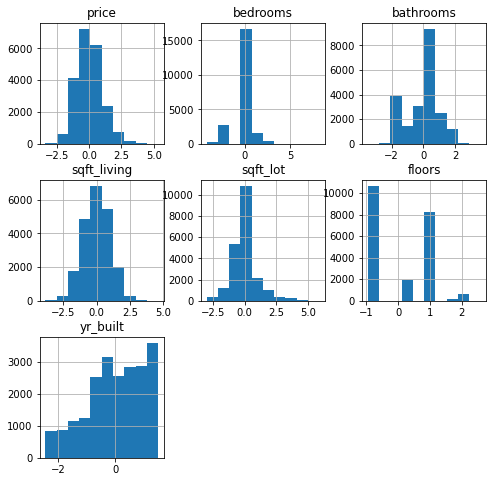

In [11]:
house_num_final = dp.numeric_transform(house)

# visualization to check normality and scales
house_num_final.hist(figsize  = [8, 8]);

### Cleaning for Categorical Columns - Encoding Binaries and Multi-categories
The binary columns are encoded as 1's and 0's. 

The columns with multiple categories are transformed into the same number of binary columns as **the number of categories minus 1**. The first binary column is removed to reduce multicollinearity.

In [12]:
house = dp.categorical_tansformation(house)

### Final Concatenation
Numerical columns and categorical columns are merged to form the final data.

In [13]:
# final merge of numericals and categoricals
house_final = dp.concatenation(house_num_final, house)

In [14]:
house_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21597 non-null  float64
 1   bedrooms             21597 non-null  float64
 2   bathrooms            21597 non-null  float64
 3   sqft_living          21597 non-null  float64
 4   sqft_lot             21597 non-null  float64
 5   floors               21597 non-null  float64
 6   yr_built             21597 non-null  float64
 7   waterfront           21597 non-null  float64
 8   view                 21597 non-null  float64
 9   is_renovated         21597 non-null  float64
 10  has_basement         21597 non-null  float64
 11  condition_Fair       21597 non-null  uint8  
 12  condition_Good       21597 non-null  uint8  
 13  condition_Very Good  21597 non-null  uint8  
 14  grade_11 Excellent   21597 non-null  uint8  
 15  grade_6 Low Average  21597 non-null 

## Analysis
Before the analysis, the data is split into train set and test set. The train set size is 75% of the whole data. This step would help validate a model.

In [15]:
from sklearn.model_selection import train_test_split

X = house_final.drop('price', axis = 1)
y = house_final['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Multicollinearity
Multicollinearity is checked using heatmap.

In [16]:
#import libraries for visualization
import code.visualizations as viz

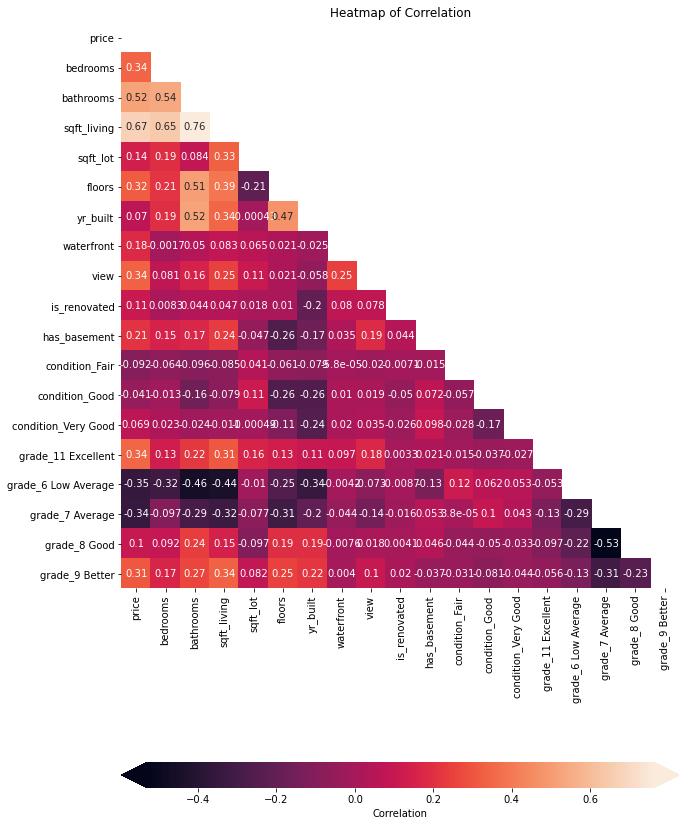

In [17]:
viz.heat_map(y_train, X_train)

### A Simple Model
The above heatmap shows "sqft_living" has the highest collinearity with the price. A regressional analysis is done using only one column.

In [18]:
dp.scores(X_train[['sqft_living']], y_train, X_test[['sqft_living']], y_test)

# train score and validation score from cross validate with 3 splits
# X-test score by fitting X-test and y-test to model fit with X train and y train
# R2 score - R squared score of y test and y prediction
# Mean**2 error - mean squared error of y test and y prediction

Train score:      0.4534361083157941
Validation score: 0.45952300008481545
X-test score:     0.45641912249708183
R2 score:         0.45641912249708183
Mean**2 Error:    0.7337180230010705


In [19]:
import statsmodels.api as sm

# Overall report
sm.OLS(y_train, sm.add_constant(X_train[['sqft_living']])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.352e+04
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        11:25:43   Log-Likelihood:                -18093.
No. Observations:               16197   AIC:                         3.619e+04
Df Residuals:                   16195   BIC:                         3.621e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0003      0.006      0.053      0.958      -0.011       0.012
sqft_living     0.6755      0.006    116.275      0.000       0.664       0.687
==============================================================================
Omnibus:                       97.981   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.075
Skew:                           0.150   Prob(JB):                     1.67e-20
Kurtosis:                       2.788   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Overall scores are around 0.45 while the mean-squared score is 0.73. Another regressional analysis is done using all columns to compare scores.

### A Model with All Possible Variables

In [20]:
dp.scores(X_train, y_train, X_test, y_test)

Train score:      0.6554961568004584
Validation score: 0.6562382822720109
X-test score:     0.637612306512999
R2 score:         0.637612306512999
Mean**2 Error:    0.59907862233999


In [21]:
sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     1713.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        11:25:43   Log-Likelihood:                -14370.
No. Observations:               16197   AIC:                         2.878e+04
Df Residuals:                   16178   BIC:                         2.892e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.9537      0.024     40.235      0.000       0.907       1.000
bedrooms               -0.0747      0.006    -11.783      0.000      -0.087      -0.062
bathrooms               0.0789      0.009      9.135      0.000       0.062       0.096
sqft_living             0.3492      0.011     32.585      0.000       0.328       0.370
sqft_lot               -0.0641      0.006    -11.071      0.000      -0.075      -0.053
floors                  0.0670      0.007      9.778      0.000       0.054       0.080
yr_built               -0.3067      0.007    -45.943      0.000      -0.320      -0.294
waterfront              0.9412      0.058     16.167      0.000       0.827       1.055
view                    0.2408      0.017     13.977      0.000       0.207       0.275
is_renovated            0.0366      0.027      1.350      0.177      -0.017       0.090
has_basement            0.0931      0.012      7.927      0.000       0.070       0.116
condition_Fair         -0.3068      0.050     -6.196      0.000      -0.404      -0.210
condition_Good          0.0380      0.012      3.256      0.001       0.015       0.061
condition_Very Good     0.1620      0.019      8.686      0.000       0.125       0.199
grade_11 Excellent      0.5412      0.037     14.640      0.000       0.469       0.614
grade_6 Low Average    -1.7971      0.033    -54.829      0.000      -1.861      -1.733
grade_7 Average        -1.3356      0.026    -51.154      0.000      -1.387      -1.284
grade_8 Good           -0.9140      0.024    -38.188      0.000      -0.961      -0.867
grade_9 Better         -0.3973      0.025    -16.194      0.000      -0.445      -0.349
==============================================================================
Omnibus:                       41.176   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.243
Skew:                          -0.034   Prob(JB):                     7.46e-12
Kurtosis:                       3.267   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The overall scores are much higher while the mean-squared score is lowered. However, this created multicollinearity (Cond. No = 21.9). The heatmap shows the numbers of bathrooms and bedrooms have noticeable correlation with squared footage of living space. 

### The Final Model
Please refer to **EDA - Model Validation**  and **EDA - Interaction** for the details on validating the final model. The columns for bathrooms and bedrooms are removed, and then an interaction column is added to increase the R-squared score.

In [22]:
X_train = X_train.drop(['bathrooms','bedrooms'],axis = 1).copy()
X_test = X_test.drop(['bathrooms','bedrooms'],axis = 1).copy()
X_train.loc[:,'interaction'] = X_train['sqft_living'] * X_train['yr_built']
X_test.loc[:,'interaction'] = X_test['sqft_living'] * X_test['yr_built']

dp.scores(X_train, y_train, X_test, y_test)

Train score:      0.6532701480220614
Validation score: 0.6523981556506147
X-test score:     0.6352544653210463
R2 score:         0.6352544653210463
Mean**2 Error:    0.601024386635919


In [23]:
sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     1792.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        11:25:43   Log-Likelihood:                -14432.
No. Observations:               16197   AIC:                         2.890e+04
Df Residuals:                   16179   BIC:                         2.904e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.9193      0.025     37.368      0.000       0.871       0.968
sqft_living             0.3313      0.008     40.086      0.000       0.315       0.348
sqft_lot               -0.0679      0.006    -11.737      0.000      -0.079      -0.057
floors                  0.0881      0.007     12.994      0.000       0.075       0.101
yr_built               -0.2792      0.006    -44.584      0.000      -0.292      -0.267
waterfront              0.9788      0.058     16.765      0.000       0.864       1.093
view                    0.2604      0.017     15.076      0.000       0.227       0.294
is_renovated            0.1019      0.027      3.751      0.000       0.049       0.155
has_basement            0.1355      0.012     11.473      0.000       0.112       0.159
condition_Fair         -0.3077      0.050     -6.190      0.000      -0.405      -0.210
condition_Good          0.0484      0.012      4.110      0.000       0.025       0.071
condition_Very Good     0.1957      0.019     10.442      0.000       0.159       0.232
grade_11 Excellent      0.5324      0.037     14.308      0.000       0.459       0.605
grade_6 Low Average    -1.8565      0.033    -56.955      0.000      -1.920      -1.793
grade_7 Average        -1.3468      0.026    -51.243      0.000      -1.398      -1.295
grade_8 Good           -0.8982      0.024    -36.872      0.000      -0.946      -0.850
grade_9 Better         -0.4014      0.025    -16.287      0.000      -0.450      -0.353
interaction             0.0449      0.005      8.519      0.000       0.035       0.055
==============================================================================
Omnibus:                       48.702   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.796
Skew:                          -0.039   Prob(JB):                     3.81e-14
Kurtosis:                       3.293   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The overall scores are very similar to the previous result while the condition number is much lowered. P-value of each coefficient are critical.

### Assumption Checks

**1. Linearity**

The below graph shows a faily linear line. The assumption of linearity can be held.

In [24]:
#Linear Regression definition
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

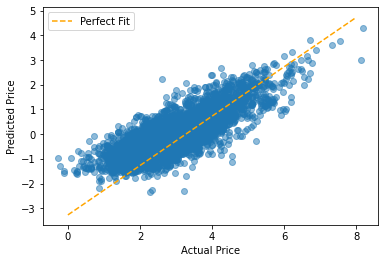

In [25]:
viz.linearity(y_test, y_pred)

**2. Normality**

QQ-plot shows a slight skewness, but most values are close to the line. This holds the normality assumption.

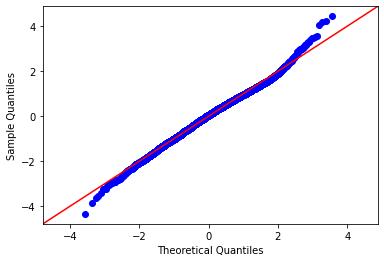

In [26]:
viz.qqplot(y_test, y_pred)

**3. Multicollinearity**

No values are above 5. It seems the "sqft_living" column has some dependency, but it is not critically high to reject the assumption.

In [27]:
dp.multicollinearity(X_train)

sqft_living            3.001670
sqft_lot               1.552016
floors                 2.046914
yr_built               1.758294
waterfront             1.086293
view                   1.313341
is_renovated           1.148279
has_basement           2.441147
condition_Fair         1.042169
condition_Good         1.647135
condition_Very Good    1.281906
grade_11 Excellent     1.278034
grade_6 Low Average    1.939542
grade_7 Average        2.077564
grade_8 Good           1.609822
grade_9 Better         1.440610
interaction            1.374175
Name: Variance Inflation Factor, dtype: float64

**4. Homoscedasticity**

There is a slight pattern on the right side of the plot, but overal it is not easy to detect a clear pattern. The assumption holds.

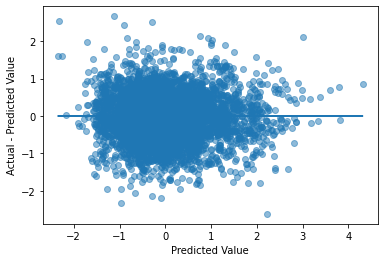

In [28]:
viz.homoscedasticity(y_test, y_pred, X_test)

### Value Prediction

Example values are set for the analysis in the below dictionary. The assigned values can be modified for a different result.

In [29]:
# Example values are assigned to the house features.
est = {'sqft_living': 2000,
       'sqft_lot': 5000,
       'floors': 3,
       'yr_built': 2000,
       'waterfront': 0,
       'view': 0,
       'is_renovated': 0,
       'has_basement': 0,
       'condition_Fair': 0,
       'condition_Good': 0,
       'condition_Very Good': 0,
       'condition_Average': 1,
       'grade_11 Excellent': 0,
       'grade_6 Low Average': 0,
       'grade_7 Average': 1,
       'grade_8 Good': 0,
       'grade_9 Better':0 ,
       'grade_10 Very Good':0
      }

In [30]:
# log transformation used in calculation
house_num_log = dp.log_transform(house)

The estimated price of a house with the example features is $382,360.

In [31]:
est_price = dp.estimation(est, house_num_log)
est_price

382359.9193760384

In [32]:
from matplotlib.ticker import FuncFormatter

Using example values assigned to the features, several graphs are shown below. For each graph, one feature is selected and assigned with a range of values to measure the expected trend.
- **The house price is expected to increase as the living area increases.**

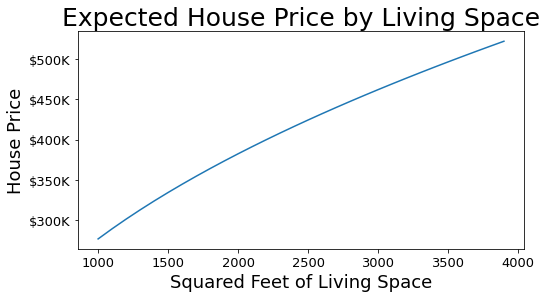

In [33]:
est_price = [dp.estimation_with_col(est, i, 'sqft_living', house_num_log)/1000 
             for i in np.arange(1000, 4000, 100)]

viz.price_living_space(est_price)

- **The house price is expected to increase with a higher number of floors.**

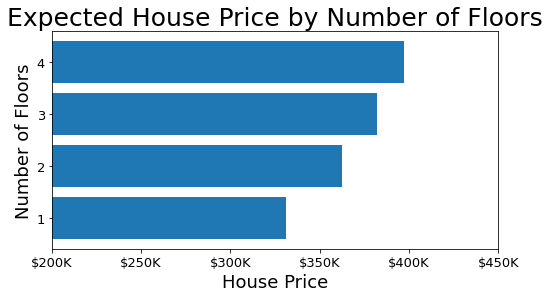

In [34]:
est_price = [dp.estimation_with_col(est, i, 'floors', house_num_log)/1000 
             for i in np.arange(1, 5, 1)]

viz.price_floor(est_price)

- **The house price is expected to increase with better maintenance.**

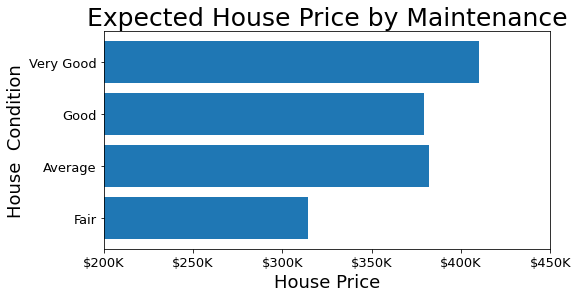

In [35]:
viz.est_price_condition(dp.est_price_condition(est, house_num_log))

- **The renovated houses tend to have a higher price.**

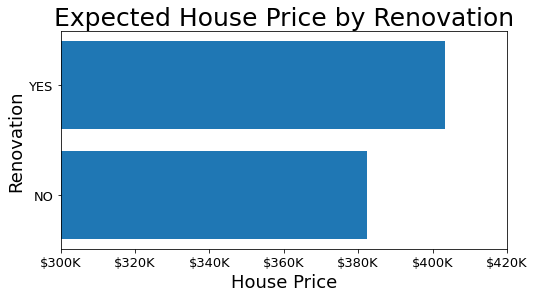

In [36]:
viz.est_price_reno(dp.est_price_reno(est, house_num_log))

## Conclusions
- **The house price tends to increase as living space and the number of floors increase.**
- **The higher price is observed for better conditions.**
- **The renovated houses have a higher price.**
- **The higher price is observed for higher grades.**
- **There is a minor negative impact on the price as the lot size increases.**

### Next Steps
Further analysis could help customers gain more insight into estimating a house price.

- **Run the analysis again using bedroom and bathroom counts without living space.** The current analysis excluded information on bedrooms and bathrooms because of collinearity. Some customers would be interested in price estimation based on bedrooms and bathrooms.
- **Run the analysis again on a specific region.** The current analysis ignores latitude and longitude to reduce complexity. Instead of including location information in the regressional model, we can set a limit for latitude and longitude before validating a model.
- **Use information from a different county.** This analysis uses information from a specific county. It would be ideal to compare the house values with the same example values in a close-by county.